In [1]:
from apportionment import Apportionment
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

testy:

3 - standard 100K/100/1000
6 - 100K/100/5000

In [ ]:
'''UNCOMMENT ONLY WHEN SIMULATING'''

# Simulation parameters
voters = 100000
num_seats = 150
nit = 100
group_size = 5000
link='NRSR2023_clean.csv'

ap = Apportionment(num_seats, voters, link=link) 
# -> TODO higher tresholds for coalitions
print("No of votes from source:", sum(ap.subject_votes.values()))
print("Considered votes:", ap.voters)
print("No. of seats:", num_seats)

#apportionment test
result = ap.divide_seats("slovak")
if not (sum(result.values()) == 150): print(result.values()) 
else: print("seats ok")
if not (list(result.values()) == [32, 16, 11, 10, 42, 27, 12]): print(result.values()) 
else: print("apport ok")
print("Apportionment should work correctly.")

print(sum(ap.probabilities.values()))
ap.iterated_simulate('boxes', f'test2811_7.csv', nit=nit, group_size=group_size)


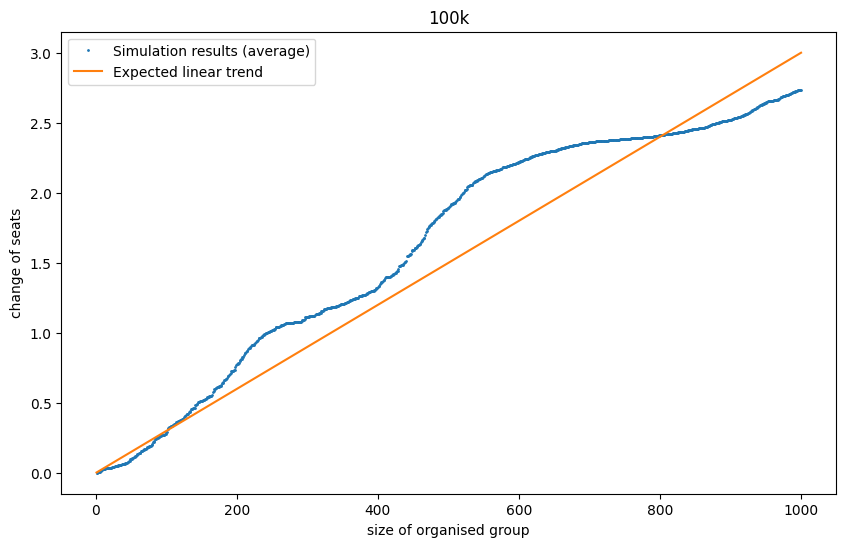

In [3]:
df = pd.read_csv('test2811_3.csv')

grouped_df = df.groupby('samples').mean()

plt.figure(figsize=(10, 6))

x_values = grouped_df.index
y_values = grouped_df['diff']

plt.plot(x_values, y_values, 'o', markersize=1, label='Simulation results (average)')

x = np.arange(1, 1001)
y = (3/1000) * x

plt.plot(x, y, label='Expected linear trend')
plt.xlabel('size of organised group')
plt.ylabel('change of seats')
plt.title('100k')

plt.legend()
plt.show()

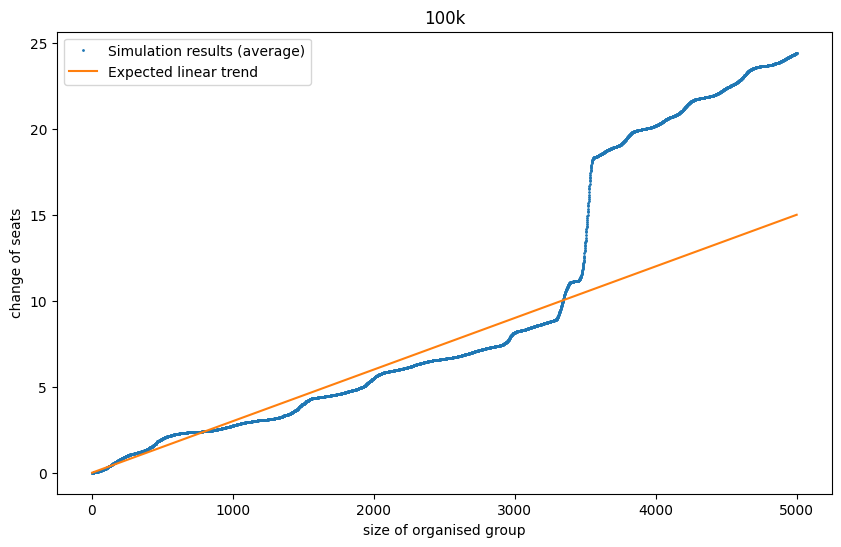

In [5]:
df = pd.read_csv('test2811_6.csv')

grouped_df = df.groupby('samples').mean()

plt.figure(figsize=(10, 6))

x_values = grouped_df.index
y_values = grouped_df['diff']

plt.plot(x_values, y_values, 'o', markersize=1, label='Simulation results (average)')

x = np.arange(1, 5001)
y = (3/1000) * x

plt.plot(x, y, label='Expected linear trend')
plt.xlabel('size of organised group')
plt.ylabel('change of seats')
plt.title('100k')

plt.legend()
plt.show()

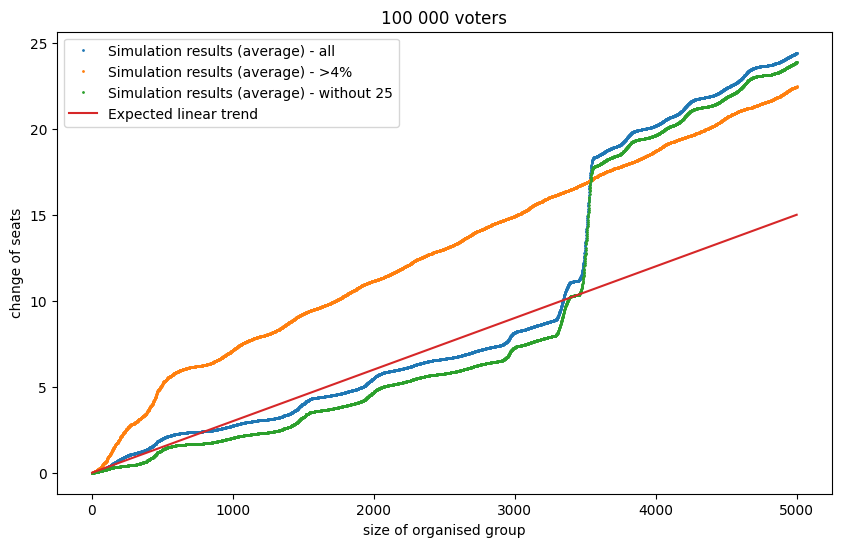

In [8]:
df = pd.read_csv('test2811_6.csv')
# display(df)
df4 = df.loc[(df['party_number'] == 0) | (df['party_number'] == 3) | (df['party_number'] == 5) | (df['party_number'] == 12) | (df['party_number'] == 15) | (df['party_number'] == 16) | (df['party_number'] == 17) | (df['party_number'] == 18) | (df['party_number'] == 23) | (df['party_number'] == 25)]
df0 = df.loc[df['party_number'] != 25] # 25 is edge case, almost got into parliament
df25 = df.loc[df['party_number'] == 25] 

grouped_df = df.groupby('samples').mean()
grouped_df4 = df4.groupby('samples').mean()
grouped_df0 = df0.groupby('samples').mean()
grouped_df25 = df25.groupby('samples').mean()


plt.figure(figsize=(10, 6))

x_values = grouped_df.index
y_values = grouped_df['diff']

plt.plot(x_values, y_values, 'o', markersize=1, label='Simulation results (average) - all')

x_values = grouped_df4.index
y_values = grouped_df4['diff']

plt.plot(x_values, y_values, 'o', markersize=1, label='Simulation results (average) - >4%')

x_values = grouped_df0.index
y_values = grouped_df0['diff']

plt.plot(x_values, y_values, 'o', markersize=1, label='Simulation results (average) - without 25')

# only 25, makes it very difficult to read other curves
# x_values = grouped_df25.index
# y_values = grouped_df25['diff']

# plt.plot(x_values, y_values, 'o', markersize=1, label='Simulation results (average) - only 25')


x = np.arange(1, 5001)
y = (3/1000) * x

plt.plot(x, y, label='Expected linear trend')
plt.xlabel('size of organised group')
plt.ylabel('change of seats')
plt.title('100 000 voters')

plt.legend()
plt.show()